In [22]:
import operator
import os
from pprint import pprint

from numpy import *
import matplotlib.pyplot as plt

In [ ]:
def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [8]:
createDataSet()

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]),
 ['A', 'A', 'B', 'B'])

In [9]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5


    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [12]:
def test1():
    group, labels = createDataSet()
    print(str(group))
    print(str(labels))
    print(classify0([0.1, 0.1], group, labels, 3))

In [13]:
test1()

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']
B


In [19]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)

    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet / tile(ranges, (m, 1))

    return normDataSet, ranges, minVals

In [17]:
def file2matrix(filename):
    fr = open(filename, 'r')
    numberOfLines = len(fr.readlines())
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    fr = open(filename, 'r')
    idx = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[idx] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        idx += 1

    return returnMat, classLabelVector


In [70]:
def datingClassTest(k: int):
    hoRatio = 0.1
    datingDataMat, datingLabels = file2matrix('../../datasets/2.kNN/datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    pprint(f'numTestVecs={numTestVecs}')
    errCount = 0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i], normMat[numTestVecs:m], datingLabels[numTestVecs:m], k)
        pprint(f'the classifier came back with: {classifierResult}, the real answer is: {datingLabels[i]}')
        errCount += classifierResult != datingLabels[i]
    
    pprint(f'the total error rate is: {errCount / numTestVecs}')
    pprint(errCount)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 15.0*array(datingLabels), 15.0*array(datingLabels))
    plt.show()

'numTestVecs=100'
'the classifier came back with: 3, the real answer is: 3'
'the classifier came back with: 2, the real answer is: 2'
'the classifier came back with: 1, the real answer is: 1'
'the classifier came back with: 1, the real answer is: 1'
'the classifier came back with: 1, the real answer is: 1'
'the classifier came back with: 1, the real answer is: 1'
'the classifier came back with: 3, the real answer is: 3'
'the classifier came back with: 3, the real answer is: 3'
'the classifier came back with: 1, the real answer is: 1'
'the classifier came back with: 3, the real answer is: 3'
'the classifier came back with: 1, the real answer is: 1'
'the classifier came back with: 1, the real answer is: 1'
'the classifier came back with: 2, the real answer is: 2'
'the classifier came back with: 1, the real answer is: 1'
'the classifier came back with: 1, the real answer is: 1'
'the classifier came back with: 1, the real answer is: 1'
'the classifier came back with: 1, the real answer is:

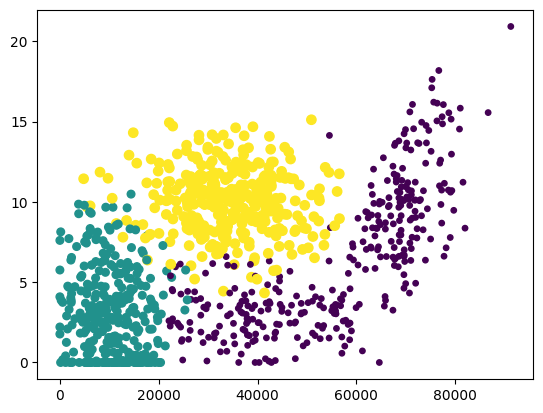

In [82]:
datingClassTest(3)

In [26]:
def img2vector(filename):
    returnVect = zeros((1, 1024))
    fr = open(filename, 'r')
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])

    return returnVect

In [76]:
def handwritingClassTest(k: int):
    hwLabels = []
    trainingFileList = os.listdir('../../datasets/2.kNN/trainingDigits')
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNameStr = int(fileStr.split('_')[0])
        hwLabels.append(classNameStr)
        trainingMat[i] = img2vector(f'../../datasets/2.kNN/trainingDigits/{fileNameStr}')

    testFileList = os.listdir('../../datasets/2.kNN/testDigits')
    errCount = 0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector(f'../../datasets/2.kNN/testDigits/{fileNameStr}')
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, k)
        pprint(f'the classifier came back with: {classifierResult}, the real answer is: {classNumStr}')
        errCount += classifierResult != classNumStr

    pprint(f'the total number of errors is: {errCount}')
    pprint(f'the total error rate is: {errCount / mTest}')

In [77]:
handwritingClassTest(3)

'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifier came back with: 0, the real answer is: 0'
'the classifie

In [79]:
def datingClassErrRate(k: int):
    hoRatio = 0.1
    datingDataMat, datingLabels = file2matrix('../../datasets/2.kNN/datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errCount = 0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i], normMat[numTestVecs:m], datingLabels[numTestVecs:m], k)
        errCount += classifierResult != datingLabels[i]

    return errCount / numTestVecs

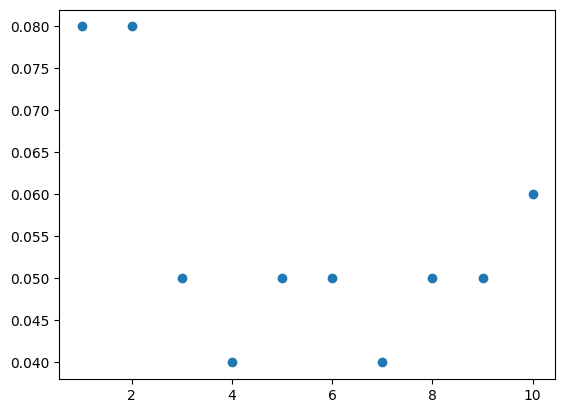

In [80]:
import matplotlib.pyplot as plt

x = range(1, 11)
y = [ datingClassErrRate(k) for k in x ]

plt.scatter(x, y)
plt.show()

In [83]:
def handwritingClassErrRate(k: int):
    hwLabels = []
    trainingFileList = os.listdir('../../datasets/2.kNN/trainingDigits')
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNameStr = int(fileStr.split('_')[0])
        hwLabels.append(classNameStr)
        trainingMat[i] = img2vector(f'../../datasets/2.kNN/trainingDigits/{fileNameStr}')

    testFileList = os.listdir('../../datasets/2.kNN/testDigits')
    errCount = 0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector(f'../../datasets/2.kNN/testDigits/{fileNameStr}')
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, k)
        errCount += classifierResult != classNumStr

    return errCount / mTest

In [ ]:
import matplotlib.pyplot as plt

x = range(1, 11)
y = [ handwritingClassErrRate(k) for k in x ]

plt.scatter(x, y)
plt.show()